# Bike sharing prediction

In [117]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
orgData=pd.read_csv("hour.csv")

In [4]:
bike=orgData.copy()

# Data preliminary analysis

In [6]:
bike.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
bike=bike.drop(['index','date','registered'],axis=1) #droped not required column

In [13]:
bike.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'demand'],
      dtype='object')

In [18]:
bike.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
demand        0
dtype: int64

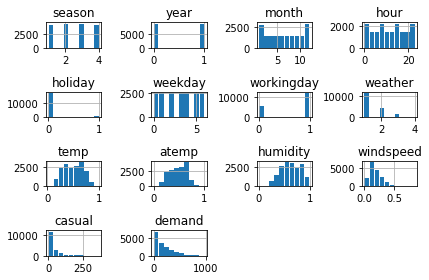

In [23]:
bike.hist(rwidth=0.9)
plt.tight_layout()

# data visualization of continuous variable with demand

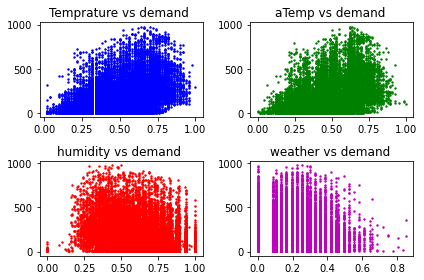

In [37]:
plt.subplot(2,2,1)
plt.title("Temprature vs demand ")
plt.scatter(bike['temp'],bike['demand'],s=2,c='b')

plt.subplot(2,2,2)
plt.title("aTemp vs demand ")
plt.scatter(bike['atemp'],bike['demand'],s=2,c='g')

plt.subplot(2,2,3)
plt.title("humidity vs demand ")
plt.scatter(bike['humidity'],bike['demand'],s=2,c='r')

plt.subplot(2,2,4)
plt.title("weather vs demand ")
plt.scatter(bike['windspeed'],bike['demand'],s=2,c='m')

plt.tight_layout()

# visualization of categorical variable

In [63]:
bike.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


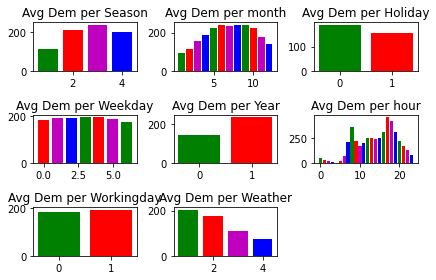

In [80]:
colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Avg Dem per Season')
cat_list = bike['season'].unique()
cat_average = bike.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Avg Dem per month')
cat_list = bike['month'].unique()
cat_average = bike.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Avg Dem per Holiday')
cat_list = bike['holiday'].unique()
cat_average = bike.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Avg Dem per Weekday')
cat_list = bike['weekday'].unique()
cat_average = bike.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Avg Dem per Year')
cat_list = bike['year'].unique()
cat_average = bike.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Avg Dem per hour')
cat_list = bike['hour'].unique()
cat_average = bike.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Avg Dem per Workingday')
cat_list = bike['workingday'].unique()
cat_average = bike.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Avg Dem per Weather')
cat_list = bike['weather'].unique()
cat_average = bike.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

# check for outlier

In [72]:
bike['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [68]:
bike['demand'].quantile([.05,.1,.2,.9,.99])

0.05      5.00
0.10      9.00
0.20     27.00
0.90    451.20
0.99    782.22
Name: demand, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1801ea533d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1801e5d7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1801e5d84c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1801ea21be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1801ea21d60>],
 'means': []}

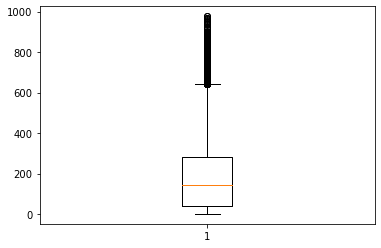

In [73]:
plt.boxplot(bike['demand'])

# Check Multiple Linear Regression Assumptions

1 Multicollinearity
2 linearity 
3 normality 
4 auto correlation


In [82]:
#linearity using the correlation coefficient matrix corr continous variable
bike[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [83]:
# Drop irrelevant features
bike = bike.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

In [84]:
bike.columns

Index(['season', 'month', 'hour', 'holiday', 'weather', 'temp', 'humidity',
       'casual', 'demand'],
      dtype='object')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1801c5e1130>)

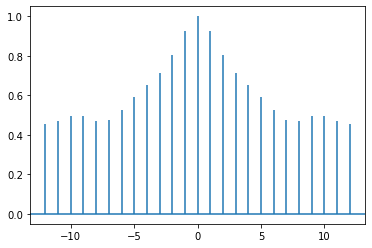

In [86]:
#auto correlation
dfautocorr=pd.to_numeric(bike['demand'],downcast='float')
plt.acorr(dfautocorr,maxlags=12)

In [87]:
#normality 

<AxesSubplot:>

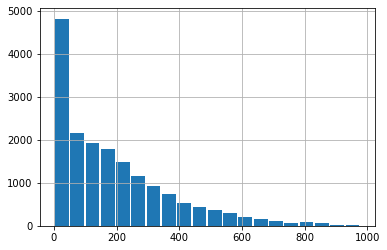

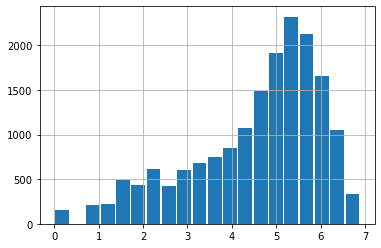

In [94]:
dfdem=bike['demand']
dfdem2=np.log(dfdem)

plt.figure()
dfdem.hist(rwidth=.9, bins=20)

plt.figure()

dfdem2.hist(rwidth=.9, bins=20)

In [95]:
#solve problem of auto correlaiton

In [96]:
b_1=bike['demand'].shift(+1).to_frame()

In [98]:
b_1.columns=['b_1']

In [100]:
b_2=bike['demand'].shift(+1).to_frame()
b_2.columns=['b_2']

In [101]:
b_3=bike['demand'].shift(+1).to_frame()
b_3.columns=['b_3']

In [102]:
bike_lag=pd.concat([bike,b_1,b_2,b_3],axis=1)

In [104]:

bike_lag=bike_lag.dropna()

In [106]:
#create dummy variable

In [114]:
bike_lag['season']=bike_lag['season'].astype('category')
bike_lag['holiday']=bike_lag['holiday'].astype('category')
bike_lag['weather']=bike_lag['weather'].astype('category')
bike_lag['month']=bike_lag['month'].astype('category')
bike_lag['hour']=bike_lag['hour'].astype('category')

C:\Users\BAIJNA~1\AppData\Local\Temp/ipykernel_20276/644115828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_lag['season']=bike_lag['season'].astype('category')
C:\Users\BAIJNA~1\AppData\Local\Temp/ipykernel_20276/644115828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_lag['holiday']=bike_lag['holiday'].astype('category')
C:\Users\BAIJNA~1\AppData\Local\Temp/ipykernel_20276/644115828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [116]:
y=bike_lag['demand']
x=bike_lag.drop(['demand'],axis=1)


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.7,random_state=123)

In [121]:
rig=LinearRegression()

In [122]:
rig.fit(x_train,y_train)

LinearRegression()

In [124]:
y_pre=rig.predict(x_test)

In [125]:
rig.score(x_test,y_test)

0.7496062813459983